# Statistics

In [1]:
from pathlib import Path
from datetime import datetime, date, time, timedelta

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import dask
import dask.dataframe as dd

In [2]:
sns.set_theme(style='darkgrid')

### Dask Configuration

In [41]:
from dask.distributed import Client, LocalCluster

In [42]:
cluster = LocalCluster(n_workers=8, processes=True)  # Launches a scheduler and workers locally
client = Client(cluster)  # Connect to distributed cluster and override default
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 16,Total memory: 31.07 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34459,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 31.07 GiB
Comm: tcp://127.0.0.1:38889,Total threads: 2
Dashboard: http://127.0.0.1:45923/status,Memory: 3.88 GiB
Nanny: tcp://127.0.0.1:33791,


## C4

In [5]:
c4_path = Path('c4/multilingual').resolve()
files = sorted(c4_path.glob('c4-uk.*.json'))

In [61]:
c4 = dd.read_json(files, lines=True)

/home/goader/.local/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


### Details

In [7]:
c4.columns

Index(['text', 'timestamp', 'url'], dtype='object')

In [8]:
c4.dtypes

text                      object
timestamp    datetime64[ns, UTC]
url                       object
dtype: object

In [9]:
c4.head(20)

,text,timestamp,url
0,Як обмежити швидкість Інтернету? | Комп'ютер\n...,2017-09-22 06:25:33+00:00,http://vidpoviday.com/yak-obmezhiti-shvidkist-...
1,Залізниця ХХІ століття: у переповненій електри...,2020-01-29 11:26:40+00:00,https://www.0312.ua/news/1797560/zaliznica-hhi...
2,Evia Top: Ασφαλιστικό: Πώς παίρνετε σύνταξη με...,2020-02-25 20:58:08+00:00,http://www.eviatopblog.gr/2020/01/blog-post_66...
3,"бортові – Termwiki, millions of terms defined ...",2020-06-06 02:15:12+00:00,https://uk.termwiki.com/UK/flatbed
4,﻿ Готовий переклад Alpha Centauri — переклади ...,2020-01-18 01:52:20+00:00,https://translate.thealphacentauri.net/book/25...
5,Мир переводов :: Підготовка систем опалення до...,2020-04-02 18:50:29+00:00,http://worldtranslation.org/uk/news/5212-pidgo...
6,BO747A33BG: Духовка Gorenje BO747A33BG/71 л/A-...,2019-11-20 21:49:27+00:00,http://service-fw.erc.ua/ru/catalog/katalog-to...
7,Сили Асада заарештували десятки мирних жителів...,2018-07-17 11:17:35+00:00,https://syria.liveuamap.com/uk/2017/19-october...
8,Інтерв'ю Оксана Зубець з Місії ООН на Кіпрі: я...,2020-08-05 14:00:38+00:00,http://un.org.ua/ua/informatsiinyi-tsentr/news...
9,"Вперше показали, як виглядає печера “Кришталев...",2019-02-18 14:39:54+00:00,https://realno.te.ua/novyny/%D0%B2%D0%BF%D0%B5...


### Date distribution

In [10]:
date_distribution = c4['timestamp'].map(lambda dt: dt.date()).value_counts().compute()

In [11]:
date_distribution

2020-07-10    169
2020-07-11    168
2019-05-24    154
2020-07-04    150
2019-09-22    149
             ... 
2015-07-04      1
2015-07-07      1
2015-07-28      1
2015-07-30      1
2013-05-18      1
Name: timestamp, Length: 570, dtype: int64

In [12]:
def plot_date_distribution(date_distribution: pd.Series):
    date_idxs = np.argsort(date_distribution.index.values)
    x = date_distribution.index.values[date_idxs]
    y = date_distribution.values[date_idxs]
    
    fig, ax = plt.subplots(figsize=(16, 12))
    
    sns.kdeplot(x=[ix.toordinal() for ix in x], weights=y, fill=True)

    ax.set_title('Documents count by date')
   
    x_min, x_max = [int(xlim) for xlim in ax.get_xlim()]

    min_year = date.fromordinal(x_min).year
    max_year = date.fromordinal(x_max).year + 1
    
    xticks_major = [
        date(year, 1, 1)
        for year in range(min_year, max_year+1)
    ]
    
    xticks_minor = [
        date(year, month, 1)
        for year in range(min_year, max_year+1)
        for month in [1, 4, 7, 10]
    ]
    
    ax.set_xticks([xtick.toordinal() for xtick in xticks_major], minor=False)
    ax.set_xticks([xtick.toordinal() for xtick in xticks_minor], minor=True)
    ax.set_xticklabels([xtick.strftime('%Y') for xtick in xticks_major], rotation=0)
    
    ax.grid(True, which='major', axis='both', linewidth=2)
    ax.grid(True, which='minor', axis='both', linewidth=0.8)

    ax.set_xlabel('publication date')
    ax.set_ylabel('documents count')

    plt.show()

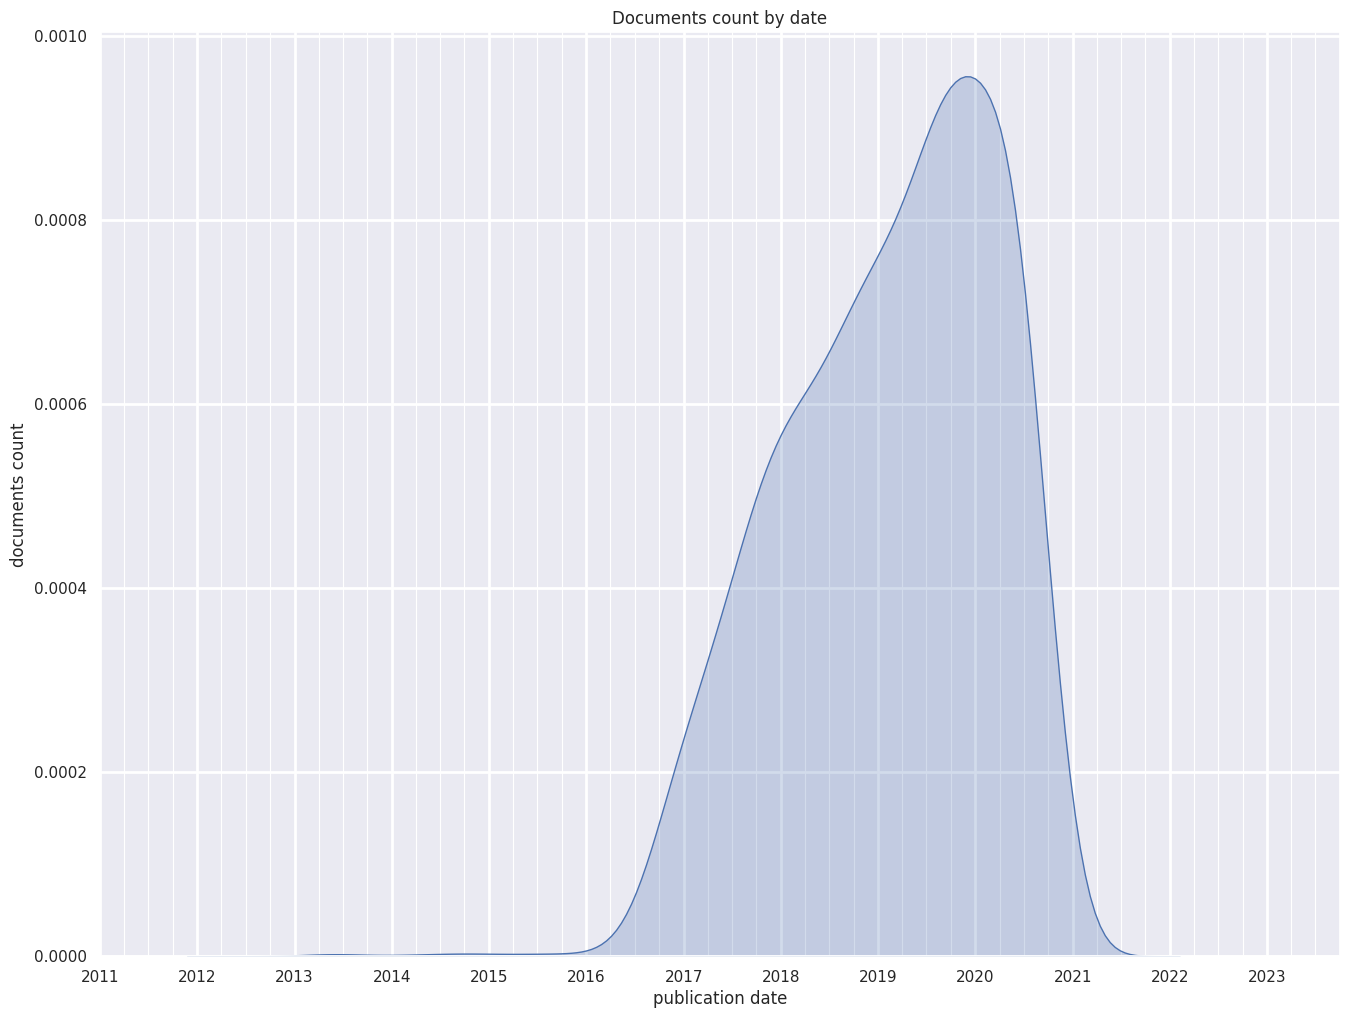

In [13]:
plot_date_distribution(date_distribution)

### URLs distribution

In [14]:
from urllib.parse import urlparse

In [15]:
def extract_domain(url: str) -> str:
    url = urlparse(url)
    domain = url.netloc.removeprefix('www.')
    return domain

In [16]:
urls_distribution = c4['url'].map(extract_domain).value_counts()
# urls_distribution = urls_distribution[urls_distribution >= 50]
urls_distribution = urls_distribution.compute().iloc[:50]

In [17]:
c4['url'].unique().size.compute()

37653

In [18]:
urls_distribution

uk.wikipedia.org         346
ukrinform.ua             281
ua.korrespondent.net     232
uk.m.wikipedia.org       204
zakon.rada.gov.ua        180
laguna.ua                171
gazeta.ua                168
radiosvoboda.org         168
5.ua                     145
br.com.ua                139
24tv.ua                  136
liveinternet.ru          124
unn.com.ua               119
tsn.ua                   118
ua.112.ua                116
unian.ua                 115
ukr.segodnya.ua          115
dt.ua                    114
zaxid.net                113
meteoprog.ua             110
yak-prosto.com           104
slovoidilo.ua            104
rbc.ua                   101
pogliad.ua                99
molbuk.ua                 91
0352.ua                   88
politeka.net              85
dw.com                    83
search.ligazakon.ua       81
youcontrol.com.ua         77
ukr.lb.ua                 77
nv.ua                     74
epravda.com.ua            72
segodnya.ua               71
zik.ua        

In [19]:
def plot_url_distribution(url_distribution: pd.Series):
    url_idxs = np.argsort(url_distribution.values)[::-1]
    x = url_distribution.index.values[url_idxs]
    y = url_distribution.values[url_idxs]
    
    fig, ax = plt.subplots(figsize=(16, int(0.4 * url_distribution.size)))
    
    sns.barplot(x=y, y=x, orient='h')

    ax.set_title('Documents count by URL')
    ax.set_xlabel('documents count')
    
    ax.set_xticks(np.arange(0, y.max() + 26, 25))

    plt.show()

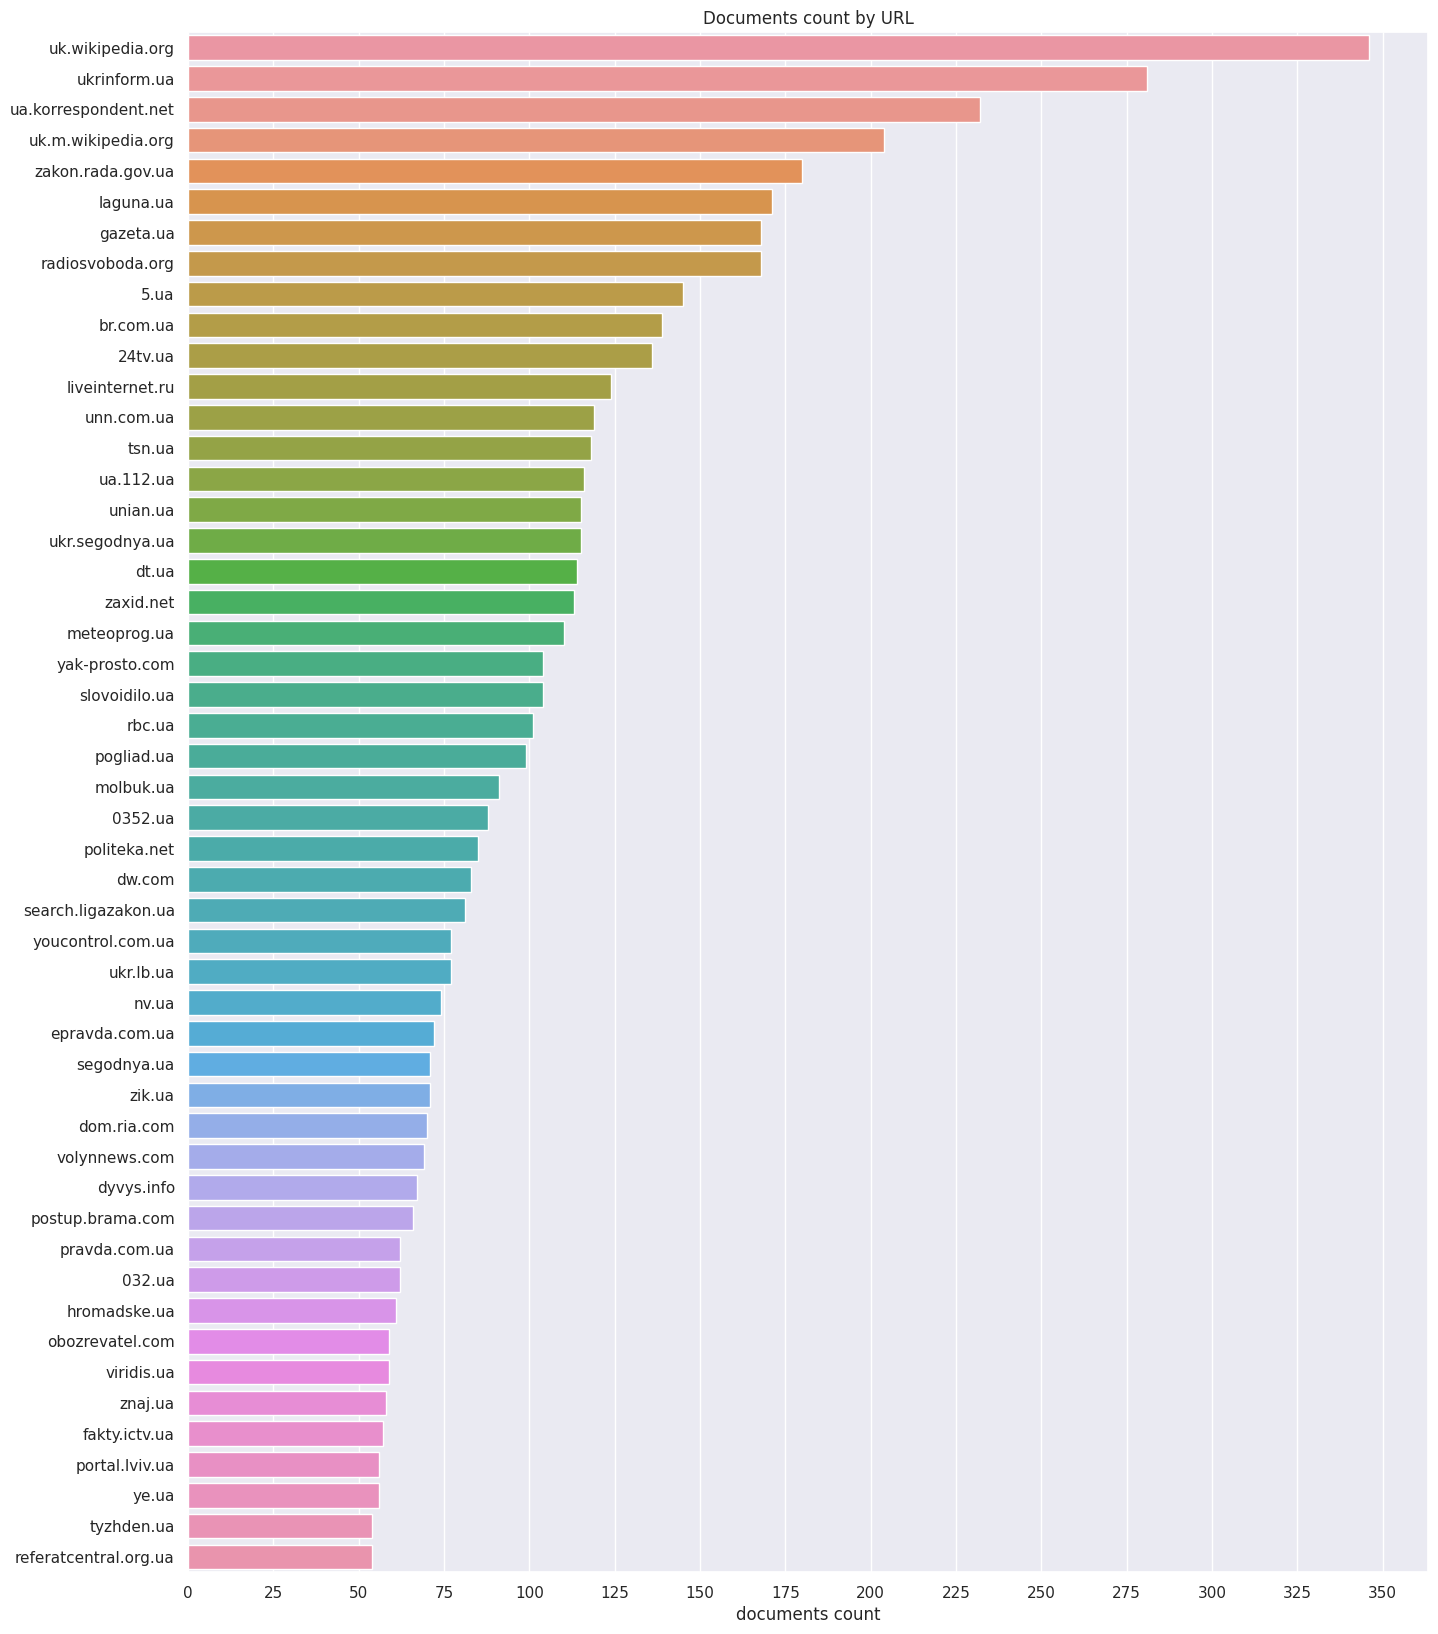

In [20]:
plot_url_distribution(urls_distribution)

### Documents Count

In [21]:
from more_itertools import sliced

In [22]:
def print_bigint(number: int, sep: str = '.'):
    string = str(number)
    
    substrings = [substring[::-1] for substring in sliced(string[::-1], 3)][::-1]
    print(sep.join(substrings))

In [23]:
print_bigint(c4.size.compute())

112.959


### Document Lengths Distribution

In [24]:
# all characters count
all_char_count = c4['text'].map(len).sum().compute()
print_bigint(all_char_count)

125.298.998


In [25]:
lengths_distribution_full = c4['text'].map(len)
lengths_distribution = lengths_distribution_full[lengths_distribution_full < 20000].value_counts().compute()

In [26]:
# over 10000
lengths_distribution_full[lengths_distribution_full >= 20000].size.compute()

698

In [27]:
lengths_distribution

141      35
78       35
97       35
111      35
87       34
         ..
6906      1
6909      1
6910      1
6911      1
19978     1
Name: text, Length: 8515, dtype: int64

In [28]:
def plot_lengths_distribution(lengths_distribution: pd.Series):
    lengths_idxs = np.argsort(lengths_distribution.index.values)
    x = lengths_distribution.index.values[lengths_idxs]
    y = lengths_distribution.values[lengths_idxs]
    
    fig, ax = plt.subplots(figsize=(16, 12))
    
    sns.kdeplot(x=x, weights=y, fill=True)

    ax.set_title('Documents lengths distribution')
   
    x_min, x_max = [int(xlim) for xlim in ax.get_xlim()]

    ax.set_xlim(0)

    ax.set_xlabel('document length')
    ax.set_ylabel('density')

    plt.show()

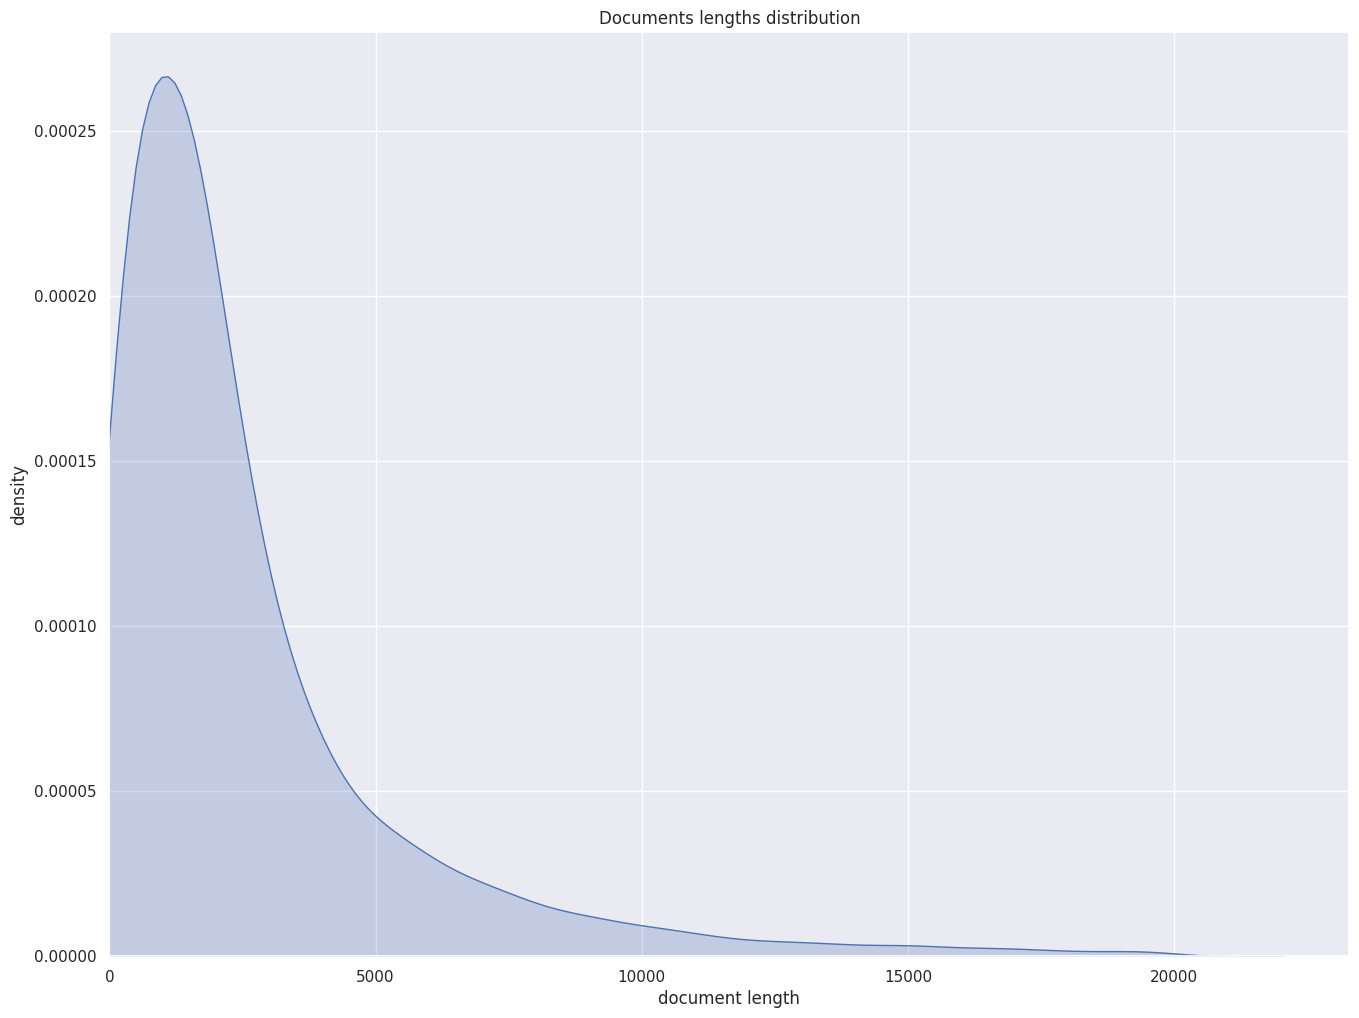

In [29]:
plot_lengths_distribution(lengths_distribution)

### Tokens Count Distribution

In [43]:
from spacy.lang.uk import Ukrainian

In [44]:
nlp = Ukrainian()
tokenizer = nlp.tokenizer

In [45]:
def tokenize(text: str) -> list[str]:
    doc = tokenizer(text)
    
    tokens = []
    for token in doc:
        if token.is_punct or token.is_space:
            continue
            
        tokens.append(token.text.lower())
    return tokens

In [46]:
def tokens_count(text: str) -> int:
    return len(tokenize(text))

In [ ]:
%%time

all_tokens_count = c4['text'].map(tokens_count, meta=pd.Series([], dtype=int)).sum().compute()
print_bigint(all_tokens_count)

/home/goader/.local/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


1